In [27]:
import numpy as np
import matplotlib.pyplot as plt
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob
import cv2
import functions
import visualize_functions
import importlib
importlib.reload(functions)
importlib.reload(visualize_functions)


wpod_net_path = "wpod-net.json"
wpod_net = functions.load_model(wpod_net_path)

Loading model successfully...


Found 1 images...


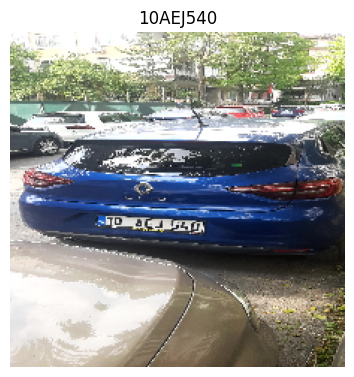

In [28]:
# Create a list of image paths 
image_paths = glob.glob("test2/10AEJ540.jpg")
print("Found %i images..."%(len(image_paths)))

# Visualize data in subplot 
fig = plt.figure(figsize=(30,20))
cols = 5
rows = 4
fig_list = []
for i in range(min(len(image_paths), cols*rows)):
    
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    img = functions.preprocess_image(image_paths[i],True)
    plt.axis(False)
    plt.imshow(img)

#plt.tight_layout(True)
plt.show()


Detect 2 plate(s) in 10AEJ540
Coordinate of plate(s) in image: 
 [array([[3.52240687e+02, 7.99346285e+02, 7.88209073e+02, 3.41103475e+02],
       [1.59785482e+03, 1.66041616e+03, 1.78234600e+03, 1.71978466e+03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]]), array([[1.33731060e+03, 1.45119511e+03, 1.43786613e+03, 1.32398161e+03],
       [1.00367711e+03, 1.07698501e+03, 1.13400644e+03, 1.06069855e+03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])]


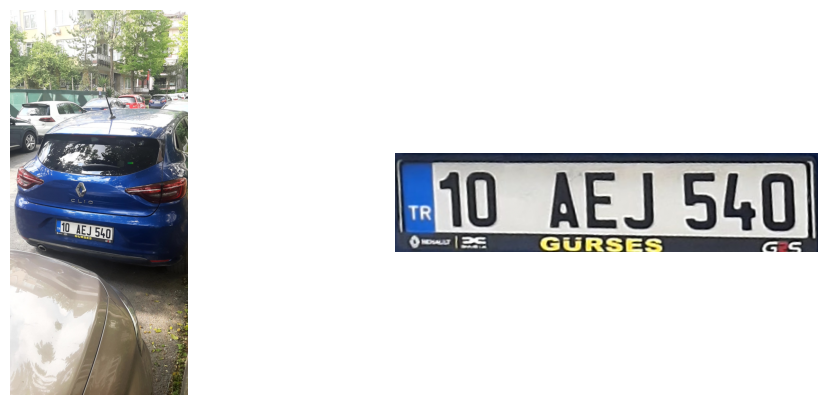

In [29]:
# forward image through model and return plate's image and coordinates
# if error "No Licensese plate is founded!" pop up, try to adjust Dmin


# Obtain plate image and its coordinates from an image
test_image = image_paths[0]
vehicle, LpImg, cor = functions.get_plate(test_image,wpod_net)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

# Visualize our result
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(functions.preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


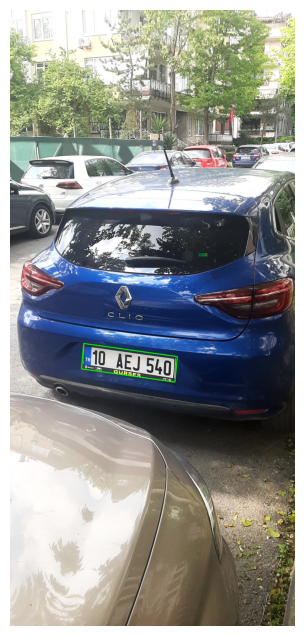

In [30]:
plt.figure(figsize=(8,8))
plt.axis(False)
plt.imshow(visualize_functions.draw_box(test_image,cor))

## The End!